# Calibration for different flows

for which no flow meter is available or is not reliable

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

%load_ext autoreload

from models_psa.curve_fitting import ensure_monotony
from models_psa.curve_fitting.calibration import fit_curve 

%autoreload 2

save_result:bool = True
result_path:Path = Path('../data/curve_fits.json')
data_path:Path = Path(f'{os.environ["HOME"]}/Nextcloud/Facilities/AQUASOLII/Diario operación AQUASOL/data')

Best-fit parameters:
Parameter 1: -0.0003028263249430021
Parameter 2: 0.1237842280794974
Parameter 3: -0.9609378680243738


/tmp/ipykernel_81650/1174054362.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_data = df['UK-SF-P001-fq'][xrange] # (%)
/tmp/ipykernel_81650/1174054362.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data = df['FT-SF-001_m3h'][xrange] # (m³/h)
/home/jmserrano/development_psa/models_psa/models_psa/curve_fitting/calibration.py:79: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(curve_function, x_data, y_data)
/home/jmserrano/development_psa/models_psa/venv/lib64/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in lo

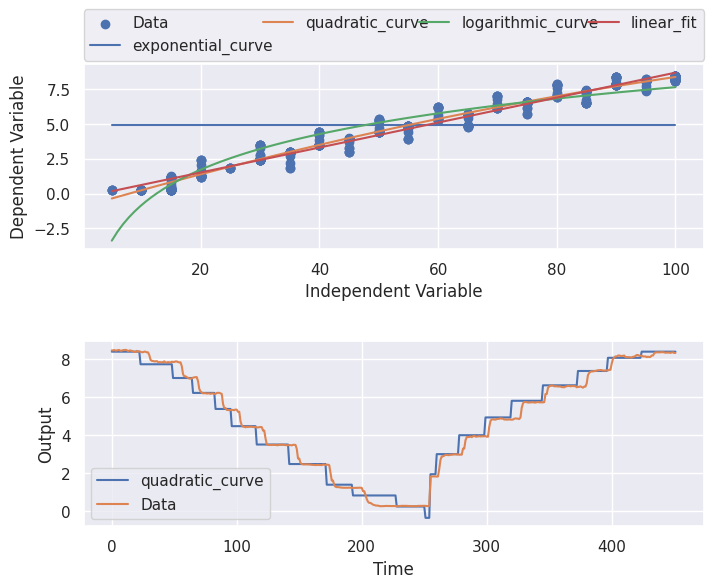

In [9]:
# Heat exchanger secondary circuit flow or thermal storage source flow fit to controlled variable

fit_name = 'FTSF001_calibration'
include_spline = False

df = pd.read_csv(data_path / "FTSF001_calibration_data.csv", index_col=0, parse_dates=True)
# xrange = np.arange(552, 795)
xrange = np.arange(0, len(df))
unit='m3/h'

x_data = df['UK-SF-P001-fq'][xrange] # (%)
y_data = df['FT-SF-001_m3h'][xrange] # (m³/h)

fit = fit_curve(x_data, y_data, fit_name, unit=unit, include_spline = include_spline,
                visualize_result=True, save_result=save_result, result_path=result_path)
